<a href="https://colab.research.google.com/github/Kartikay001/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

First of all we are importing all the important libraries that will help us perform all the operations in a sufficient manner and with ease

In [44]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading the path
path="/content/drive/MyDrive/Alma/Global Terrorism Data.csv"

In [4]:
#Reading file
df=pd.read_csv(path,encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We are trying to understand here that what all informations are present so that we can decide that how it would help us analyse the best possible things in an efficient way and without a bias or sound of irrelevant columns

In [5]:
#Checking the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#Checking the clolumns
[i for i in df.columns]

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

After analysing the columns I decided to keep all the major columns that will help us analyse that how this global terrorism is working and how it is affecting the different countries or how some countries are involved in the most attacks so that a proper planning can be done to deal with such countries and targetted countries can plan good strategies to help themselves protect from such vicious attacks

In [7]:
#Keeping relevant columns
df=df[["eventid","iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","attacktype1_txt","targtype1_txt","targsubtype1_txt","natlty1_txt","gname","weaptype1_txt","success","ransom","ransomamt","motive"]]

In [8]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,weaptype1_txt,success,ransom,ransomamt,motive
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,Unknown,1,0.0,NaN,NaN
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,1,1.0,800000.0,NaN
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,1,0.0,NaN,NaN
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,1,0.0,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,1,0.0,NaN,NaN


Checking the null values column wise and their data types so that they can be treated to make sure that sanity is properly done

In [9]:
#Checking Null Values
df.isna().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
natlty1_txt           1559
gname                    0
weaptype1_txt            0
success                  0
ransom              104310
ransomamt           180341
motive              131130
dtype: int64

In [10]:
#Checking columnn datatypes
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
country_txt          object
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
natlty1_txt          object
gname                object
weaptype1_txt        object
success               int64
ransom              float64
ransomamt           float64
motive               object
dtype: object

Checking the statistics of the table that can help us under more better about the data and variance of its values

In [45]:
#Checking the statistics of the data
stat=df.describe()
stat


,eventid,iyear,imonth,iday,latitude,longitude,success,ransom,ransomamt
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,77381.000000,1.350000e+03
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,-0.145811,3.172530e+06
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,1.207861,3.021157e+07
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,-9.000000,-9.900000e+01
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000e+00
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,1.500000e+04
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,4.000000e+05
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000e+09


,eventid,iyear,imonth,iday,latitude,longitude,success,ransom,ransomamt
count,1.762990e+05,176299.000000,176299.000000,176299.000000,176299.000000,1.762990e+05,176299.000000,176299.000000,1.762990e+05
mean,2.002995e+11,2002.928996,6.467666,15.517575,23.509977,-4.611138e+02,0.887895,-0.063137,2.364728e+04
std,1.322038e+09,13.220287,3.388738,8.809147,18.578802,2.052634e+05,0.315496,0.795148,2.655649e+06
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,-9.000000,-9.900000e+01
25%,1.991061e+11,1991.000000,4.000000,8.000000,11.558831,4.420606e+00,1.000000,0.000000,0.000000e+00
50%,2.009072e+11,2009.000000,6.000000,15.000000,31.502243,4.323489e+01,1.000000,0.000000,0.000000e+00
75%,2.014090e+11,2014.000000,9.000000,23.000000,34.685087,6.865014e+01,1.000000,0.000000,0.000000e+00
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000e+09


Heatmap is the best way to understand that how much some columns can be properly correlated with them and how much columns can be associated with each other than can help us to reach some conculsion and draw some results instead of working on the columns that generally dont influence each other

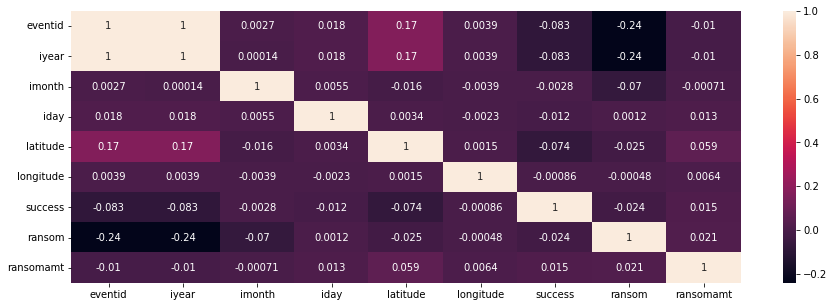

In [12]:
#Finding correlation between the variables
cor=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(cor,annot=True)
plt.show()

Dropped the values from the columns of state,city,longitude and latitude as according to me absence of such values will not help us anyways to understand the impact of attacks in a particular country or region or even we can not fill these values with mean mode or median i feel because it can make some area by mistake as a target that may have been targetted just one time and can miss some other regions which are more sensitive

In [13]:
#Dropping Null Values of Provstate, City, latitude, Longitude as missing of these significant column values will not help us majory
df=df.dropna(subset=["provstate","city","latitude","longitude"])

Filled the values with the median as the features are significant so can not drop the null values and filled the null values that have been occuring most number of times as these things like ransom, motive are mostly common in the terrorist activities

In [14]:
df["ransomamt"]= df["ransomamt"].fillna(df["ransomamt"].mode()[0])
df["ransom"]= df["ransom"].fillna(df["ransom"].mode()[0])
df["motive"]= df["motive"].fillna(df["motive"].mode()[0])
df["targsubtype1_txt"]=df["targsubtype1_txt"].fillna(df["targsubtype1_txt"].mode()[0])
df["natlty1_txt"]=df["natlty1_txt"].fillna(df["natlty1_txt"].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
df.shape

(176299, 20)

In [16]:
df.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
natlty1_txt         0
gname               0
weaptype1_txt       0
success             0
ransom              0
ransomamt           0
motive              0
dtype: int64

In [17]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,weaptype1_txt,success,ransom,ransomamt,motive
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,1,1.0,800000.0,Unknown
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,1,0.0,0.0,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,1,0.0,0.0,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,1,0.0,0.0,Unknown
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,Police,"Police Building (headquarters, station, school)",United States,Black Nationalists,Firearms,1,0.0,0.0,To protest the Cairo Illinois Police Deparment


Here we have tried to look at the demands of ransoms that how they have been varying with timeand basically we saw in heatmap that their corelation was almost 0 which means these both things do not compliment each other in any way. This now we have prooved that in both min and max case there is not pattern and we can not conclude if with time ransom demand is increasing or decreasing

In [18]:
#Checkig the max and min ransom amts taken as ransom as per years
ransom_amt=df.groupby(["iyear"])["ransomamt"].sum().reset_index()
ransom=ransom_amt.sort_values("ransomamt",ascending=False)
max_ransom=ransom.head(10)
min_ransom=ransom.tail(10)
print("Maximum Ransom taken by the terrorists in term of top 10 years ")
print("    ")
print(max_ransom)
print("    ")
print("Minimum Ransom taken by the terrorists in term of top 10 years ")
print("    ")
print(min_ransom)

Maximum Ransom taken by the terrorists in term of top 10 years 
    
    iyear     ransomamt
8    1978  1.132599e+09
43   2014  4.553920e+08
41   2012  4.061407e+08
28   1999  2.090529e+08
23   1994  2.043841e+08
44   2015  1.872593e+08
26   1997  1.671755e+08
40   2011  1.454944e+08
25   1996  1.293552e+08
11   1981  1.002960e+08
    
Minimum Ransom taken by the terrorists in term of top 10 years 
    
    iyear   ransomamt
38   2009  8412997.77
5    1975  5693300.00
12   1982  4604999.00
31   2002  3364163.00
16   1986  2590000.00
22   1992  2017000.00
0    1970  1887000.00
27   1998   732103.00
1    1971   680000.00
20   1990        0.00


The first step was to analyse that how corelated are the years and attacks and at which rate they are increasing and decreasing as this can help the particular governments forcaset the danger their country can be in with time and they can plan some measures to avoid or atleast control such incidents and in same way if some countries who are spending more than required on their safty budget can reduce their budgets depending the attacks have decreased or almost came to 0 with time

In [19]:
#Checking the number of attacks per year
attacks=df["iyear"].value_counts().sort_values()
attacks

1971      463
1973      464
1972      547
1974      574
1970      641
1975      726
1998      891
1976      898
2004     1136
2003     1263
1977     1291
2002     1310
1999     1341
1978     1444
2000     1772
2001     1881
2005     1985
1982     2396
1981     2448
1979     2521
1980     2553
1983     2657
2006     2660
1986     2674
1985     2675
1996     2883
1995     2894
1997     2942
1987     2983
2007     3162
1984     3188
1994     3251
1988     3460
1990     3626
1989     4134
1991     4378
2009     4556
2008     4668
2010     4754
1992     4774
2011     5003
2012     8470
2017    10851
2013    11926
2016    13530
2015    14861
2014    16794
Name: iyear, dtype: int64

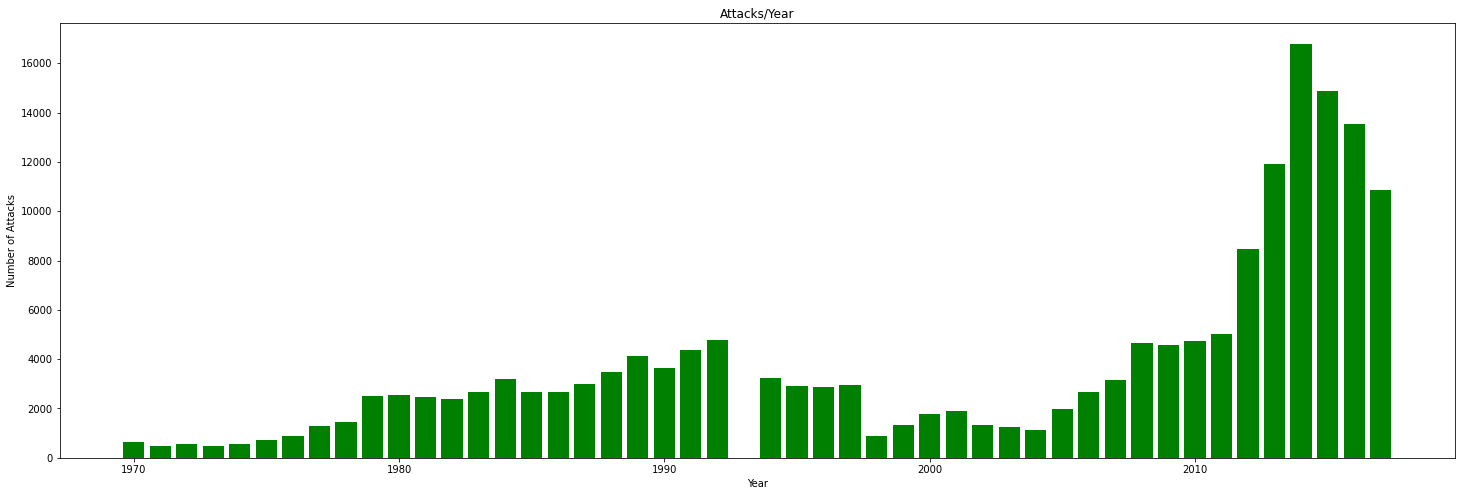

In [20]:
#Plotting the number of attacks per year
plt.figure(figsize=(25,8))
plt.bar(x=attacks.index,height=attacks,color="green")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Attacks/Year")
plt.show()

Over here we are trying to find out the countries in each country that are most sensitive so that on global level a proper budget allocation or may be scurity measures can be taken to deploy them in the sensitive countries and policies can be make for the people visiting those countries so that they can be secure during their visit 

In [21]:
#Checking the number of attacks in country as per the continents
a=df.groupby(["region_txt","country_txt"])["country_txt"].count()

In [22]:
b=pd.DataFrame(a)
b.rename(columns={"country_txt":"country"},inplace=True)
b.sort_values("country",ascending=False)

country
region_txt                  country_txt                 
Middle East & North Africa  Iraq                   24471
South Asia                  Pakistan               14307
                            Afghanistan            12500
                            India                  11801
South America               Colombia                7835
...                                                  ...
Sub-Saharan Africa          Equatorial Guinea          1
Middle East & North Africa  International              1
East Asia                   North Korea                1
Central America & Caribbean Antigua and Barbuda        1
                            St. Kitts and Nevis        1

[204 rows x 1 columns]

Over here we tried to analyse that what are the most significant motives behind these attacks so that those reasons can be worked on to reduce such incidents. Here I tried to just mention the top 5 as the visualization would not be not that good if used all motives because of space constraint. However by importing this data in the Tableu or Power Bi we can actually visuallize all the motives with their frequency of being the reason of attack

In [23]:
#Top 5 motives involved in the attacks
motive=df["motive"].value_counts().sort_values(ascending=False).head()
motive

Unknown                                                                                                                                                                                               141247
The specific motive for the attack is unknown.                                                                                                                                                         14071
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.       296
The specific motive for the attack is unknown..                                                                                                                                                          146
The specific motive for the attack is unknown or was not reported.                                                                                                                  

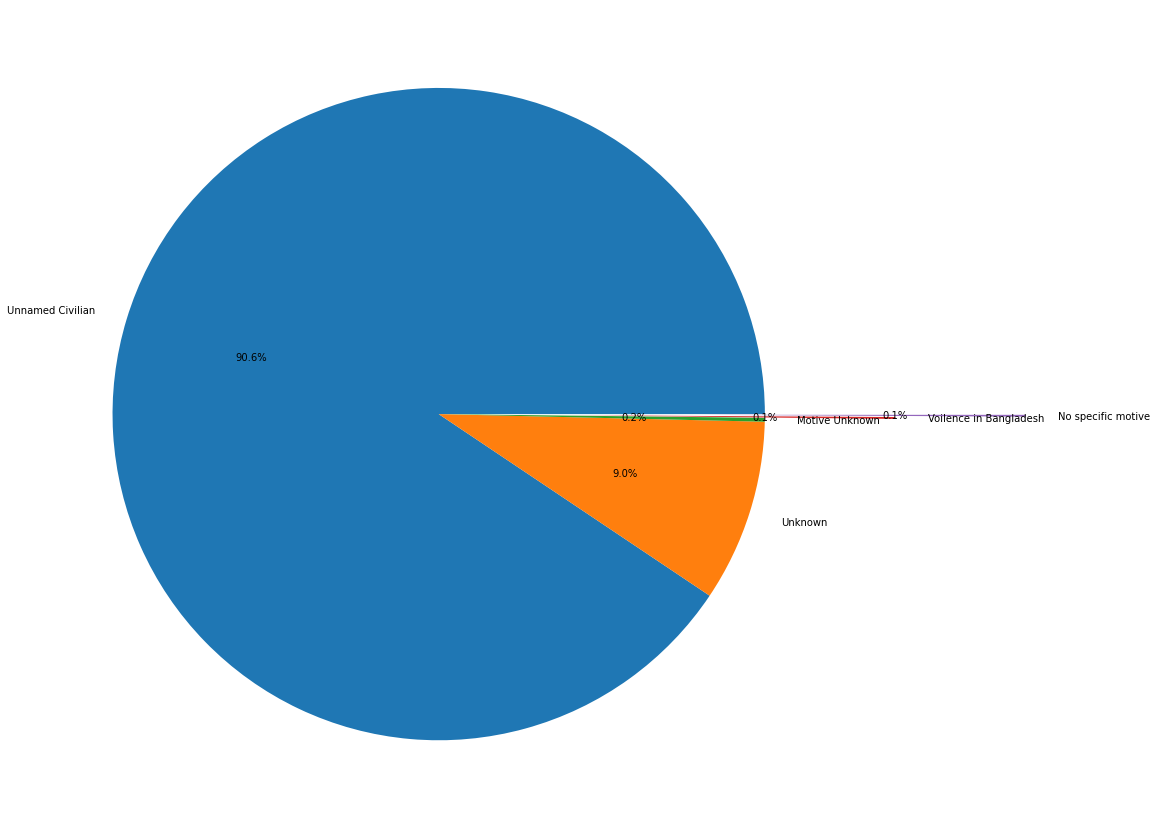

In [24]:
plt.figure(figsize=(15,15))
labels=["Unnamed Civilian","Unknown","Motive Unknown","Voilence in Bangladesh","No specific motive"]
myexplode=[0,0,0,0.4,0.8]
plt.pie(motive,labels=labels,explode=myexplode, autopct='%1.1f%%')
plt.show()

Here we tried to analyse the weapons that have been used most of the times for the attack so that a caution can be taken care on those things and perople with their posession can be kept an eye on to avoid any casualties

In [25]:
#Top 5 weapons used for the attack
weapon=df["weaptype1_txt"].value_counts().head(5)
weapon

Explosives    90753
Firearms      56160
Unknown       14205
Incendiary    10897
Melee          3537
Name: weaptype1_txt, dtype: int64

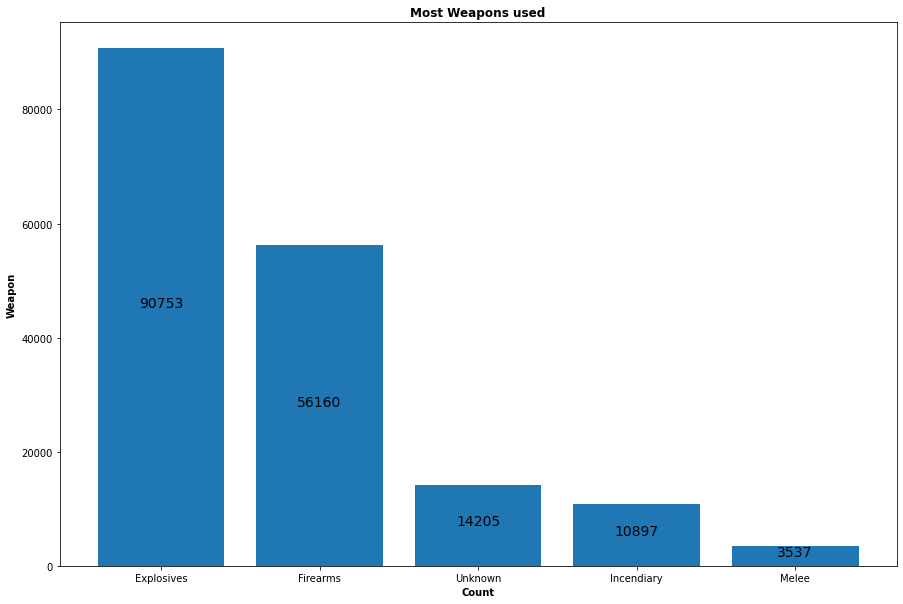

In [26]:
plt.figure(figsize=(15,10))
plt.bar(weapon.index,weapon)
for i,j in enumerate(weapon):
    plt.text(x=i,y=j/2,s=j,ha="center",fontsize="14")
plt.ylabel("Weapon",weight="bold")
plt.xlabel("Count",weight="bold")
plt.title("Most Weapons used",weight="bold")
plt.show()

Here our main focus on the sensitive countries on a global level that can be put under an eye to make sure the people or diplomates visiting their can be alerted or given proper security. Apart from that this can help us organizations like UN to make some policies that they can give to respective countries to make sure that they are able to workout on some solutions

In [27]:
#Countries impacted most
countries=df["country_txt"].value_counts().head(15)

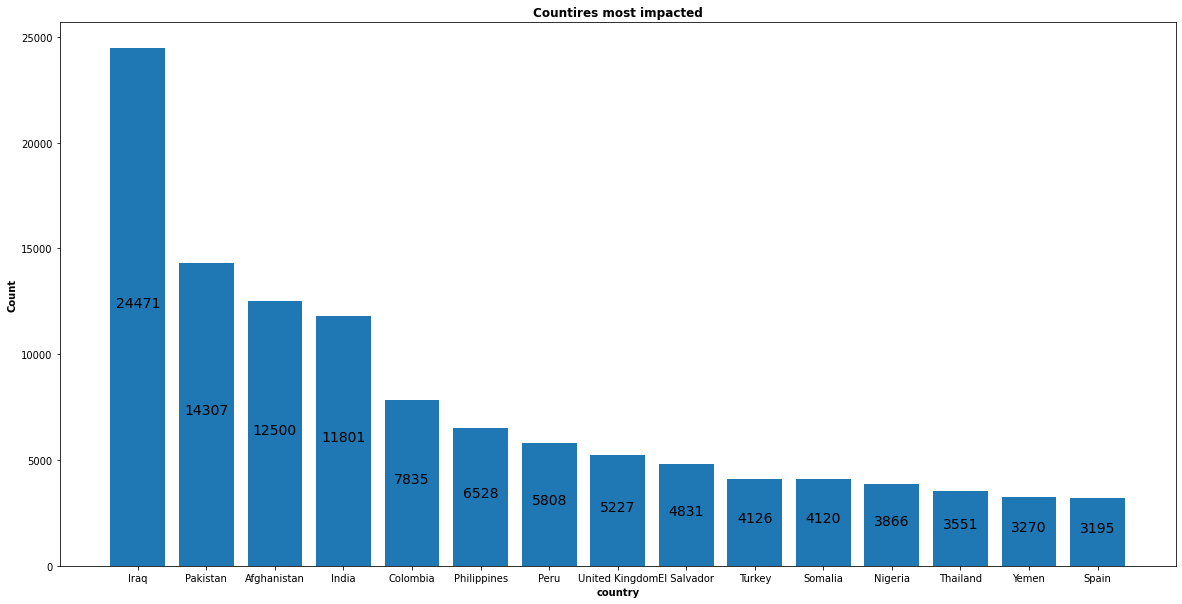

In [28]:
plt.figure(figsize=(20,10))
for i,j in enumerate(countries):
    plt.text(x=i,y=j/2,s=j,ha="center",fontsize="14")
plt.bar(countries.index,countries)
plt.xlabel("country",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title("Countires most impacted",weight="bold")
plt.show()

Here we are trying to analyse the rate at which the attacks have been increasing or decreasing in particular continents and how fast this change is occuring which can help work on the protective measures

In [29]:
#Attacks in the continents per year
cont_attack=df.groupby(["iyear"])["region_txt"].value_counts().unstack()
cont_attack

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1.0,5.0,NaN,1.0,12.0,28.0,472.0,63.0,1.0,9.0,NaN,49.0
1971,1.0,4.0,NaN,1.0,5.0,52.0,247.0,23.0,NaN,5.0,1.0,124.0
1972,2.0,3.0,NaN,NaN,NaN,52.0,70.0,25.0,1.0,16.0,4.0,374.0
1973,1.0,6.0,NaN,2.0,1.0,18.0,64.0,78.0,1.0,1.0,4.0,288.0
1974,1.0,10.0,NaN,3.0,2.0,42.0,110.0,81.0,2.0,3.0,5.0,315.0
1975,NaN,9.0,NaN,10.0,NaN,44.0,159.0,53.0,4.0,5.0,10.0,432.0
1976,NaN,42.0,NaN,1.0,NaN,51.0,123.0,90.0,4.0,7.0,8.0,572.0
1977,NaN,23.0,NaN,4.0,2.0,209.0,149.0,104.0,2.0,7.0,27.0,764.0
1978,2.0,186.0,NaN,32.0,2.0,125.0,113.0,209.0,2.0,37.0,31.0,705.0


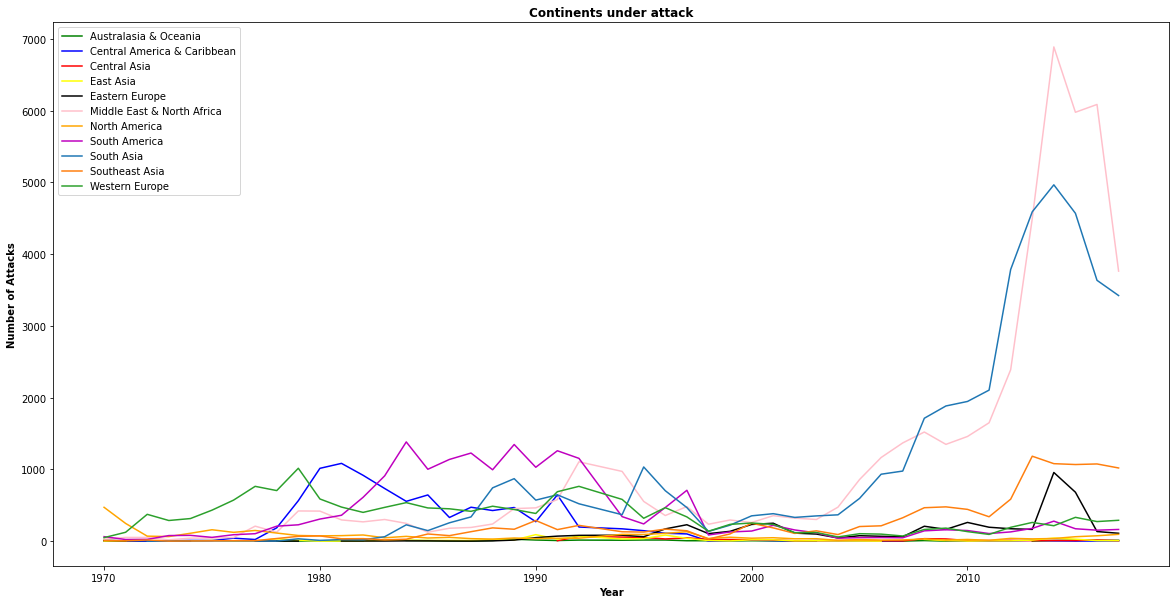

In [30]:
plt.figure(figsize=(20,10))
plt.plot(cont_attack["Australasia & Oceania"],c="green",label="Australasia & Oceania")
plt.plot(cont_attack["Central America & Caribbean"],c="blue",label="Central America & Caribbean")
plt.plot(cont_attack["Central Asia"],c="red",label="Central Asia")
plt.plot(cont_attack["East Asia"],c="yellow",label="East Asia")
plt.plot(cont_attack["Eastern Europe"],c="black",label="Eastern Europe")
plt.plot(cont_attack["Middle East & North Africa"],c="pink",label="Middle East & North Africa")
plt.plot(cont_attack["North America"],c="orange",label="North America")
plt.plot(cont_attack["South America"],c="m",label="South America")
plt.plot(cont_attack["South Asia"],label="South Asia")
plt.plot(cont_attack["Southeast Asia"],label="Southeast Asia")
plt.plot(cont_attack["Western Europe"],label="Western Europe")
plt.xlabel("Year",weight="bold")
plt.ylabel("Number of Attacks",weight="bold")
plt.title("Continents under attack",weight="bold")
plt.legend()
plt.show()

We tried to analyse the successful and failed attack ratio year wise that would help us know that how the measures that are being taken on global level helping reduce the number of attacks. Also this can help us know effectivness of the protective measures and how they can be modified to make them more better than their current levels

In [31]:
#Failed and Successful attacks per year
attack_attempt=df.groupby(["iyear","success"])["success"].count().unstack()

In [32]:
attack_attempt=attack_attempt.rename(columns={0:"Failure",1:"Success"})
attack_attempt

success,Failure,Success
iyear,,
1970,101,540
1971,51,412
1972,101,446
1973,39,425
1974,36,538
1975,34,692
1976,61,837
1977,125,1166
1978,112,1332


Text(0.5, 1.0, 'Ratio of successful anf failed attempts')

<Figure size 2880x1080 with 0 Axes>

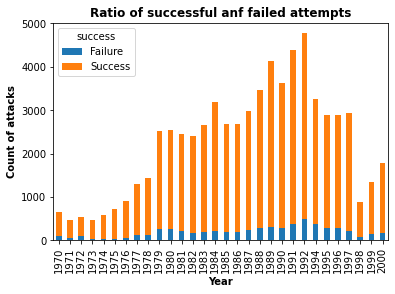

In [33]:
plt.figure(figsize=(40,15))
attack_attempt.head(30).plot(kind="bar",stacked=True)
plt.xlabel("Year",weight="bold")
plt.ylabel("Count of attacks",weight="bold")
plt.title("Ratio of successful anf failed attempts",weight="bold")

In [34]:
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,weaptype1_txt,success,ransom,ransomamt,motive
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,1,1.0,800000.0,Unknown
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,1,0.0,0.0,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,1,0.0,0.0,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,1,0.0,0.0,Unknown
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,Police,"Police Building (headquarters, station, school)",United States,Black Nationalists,Firearms,1,0.0,0.0,To protest the Cairo Illinois Police Deparment


Here we tried to analyse the sensitive states of India that have been most targetted by the vicious elements so that pro active measures can be taken to reduce such activities and security can be deployed for the safety of the common people living in such countries

In [35]:
#Maximum attacks in India statewise
india_attacks=df[df["country_txt"]=="India"]
india_attacks=india_attacks.groupby(["provstate"])["success"].count().sort_values(ascending=False).head(15)
india_attacks

provstate
Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           649
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Name: success, dtype: int64

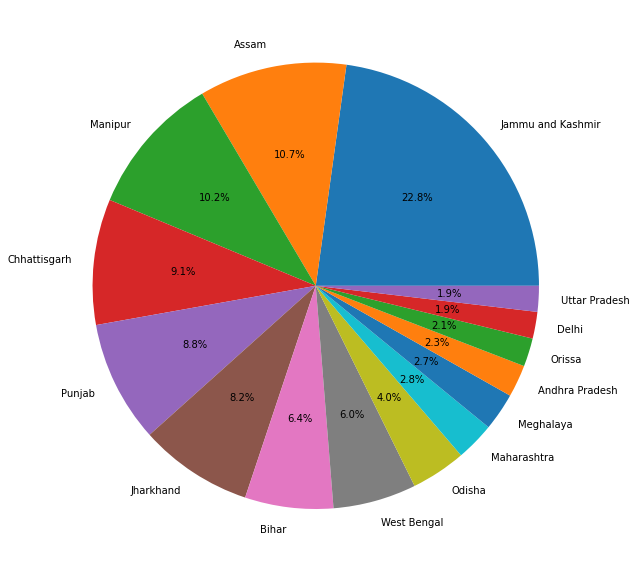

In [36]:
plt.figure(figsize=(10,15))
plt.pie(india_attacks,labels=india_attacks.index, autopct='%1.1f%%')
plt.show()

Here we tried to analyse the attacks in india in terms of the months that would be significant in analysing that what are the sensitive occassions where the attacks occur most frequently or what are the seasons that are most easy for the terrorists to attack in a particular area

In [37]:
#Which month in India is most active in terms of attacks
month=["January","February","March","April","May","June","July","August","September","October","November","December"]
month1=[1,2,3,4,5,6,7,8,9,10,11,12]
months=dict(list(zip(month1,month)))
months
df["month"]=df["imonth"].map(months)

In [38]:
month_attacks=df[df["country_txt"]=="India"]
month_attacks=month_attacks.groupby(["month"])["success"].count().reset_index()
month_attacks.sort_values("success")

,month,success
2,December,806
3,February,809
11,September,838
7,March,869
9,November,957
4,January,960
10,October,1000
6,June,1008
5,July,1059
1,August,1137


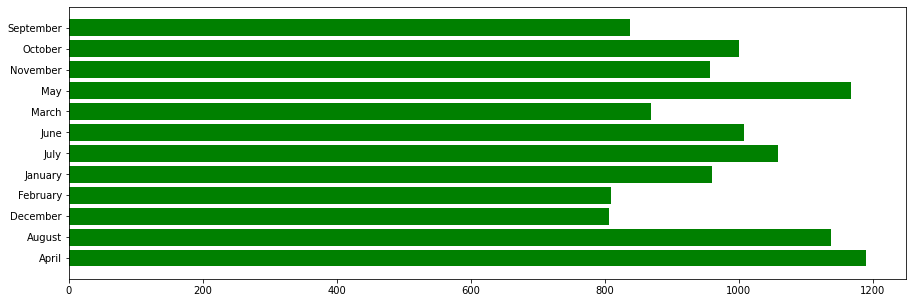

In [39]:
plt.figure(figsize=(15,5))
plt.barh(y=month_attacks["month"],width=month_attacks["success"],color="green")
plt.show()

Here we tried to analyse the nationalities that have been most prominant in the attacks and have indulged into such terrorist activitie. This will help us to keep an eye on the people coming from those particular nations and do some extra checks that will help us making sure that harmony of country is not disturbed

In [40]:
#Top10 nationalities who attack the most
tgt_nationals=df["natlty1_txt"].value_counts().reset_index().head(10)
tgt_nationals.rename(columns={"index":"Country","natlty1_txt":"Count"},inplace=True)
tgt_nationals

,Country,Count
0,Iraq,25495
1,Pakistan,13842
2,India,11932
3,Afghanistan,10761
4,Colombia,7473
5,Philippines,6321
6,Peru,5555
7,United States,4944
8,El Salvador,4722
9,Turkey,4450


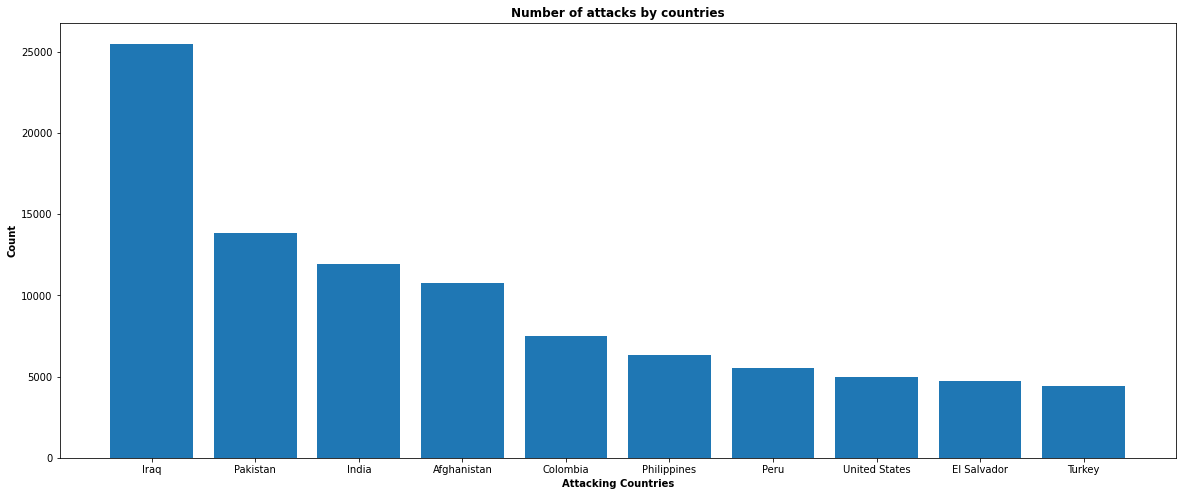

In [41]:
plt.figure(figsize=(20,8))
plt.bar(x=tgt_nationals["Country"],height=tgt_nationals["Count"])


plt.xlabel("Attacking Countries",weight="bold")
plt.ylabel("Count",weight="bold")
plt.title("Number of attacks by countries",weight="bold")
plt.show()

Here we tried to analyse the successful and failed attacks by the nationalities that has been most active in such activities and this can help us encounter the potential targets who have been most lethal in such activities and measures can be taken to reduce their capabilities of conducting such attacks for the better and peaceful environment around the globe

In [42]:
#Successful and unsuccessful attacks by those natinalities
tgt1_nationals=df.groupby(["natlty1_txt","success"])["success"].count().unstack().reset_index()
tgt1_nationals.rename(columns={0:"Failure",1:"Success"},inplace=True)
tgt1_nationals.fillna(0,inplace=True)
tgtt1_nationals=tgt1_nationals.sort_values("Success",ascending=False).head(10)
tgtt1_nationals

success,natlty1_txt,Failure,Success
86,Iraq,3310.0,22185.0
141,Pakistan,1727.0,12115.0
82,India,1684.0,10248.0
0,Afghanistan,1112.0,9649.0
36,Colombia,550.0,6923.0
147,Philippines,888.0,5433.0
146,Peru,325.0,5230.0
54,El Salvador,85.0,4637.0
198,United States,697.0,4247.0
191,Turkey,392.0,4058.0


<Figure size 7200x7200 with 0 Axes>

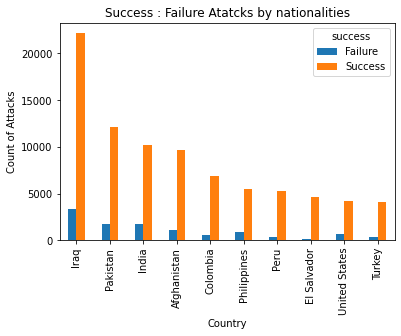

In [43]:
plt.figure(figsize=(100,100))
tgtt1_nationals.plot(x="natlty1_txt",kind="bar",stacked=False)
plt.xlabel("Country")
plt.ylabel("Count of Attacks")
plt.title("Success : Failure Atatcks by nationalities")
plt.show()

This is the end of all the analysis that we have done on the data of global terrorism that can help us on a level to make sure of taking the important measures by the countries on their level and global organizations on a global level. This will in turn help them stop such mishappenings occur in future or if not prevent then atleast reduce the casulaties and occuring frequency of such events. By doing proper analysis of such events regularly can help world in a significant way to put an end or atleast reduce such viscious activities.




Analyst
Kartikay Kaushal

Conclusion
1. Asian countries have been most prominant in the attacks and creating terrorist activities especially Afghanistan and Pakistan
2. Western countries have been impacted the most and have suffered many casualties
3. Most of the prominant reasons of the attacks are Regional and Political differences
4. When it comes to the weapons then the explosives have been the most lethal source used by the terrorists for attacks
5. When it comes to the highest attack ration then countries like Afghanistan, Iraq and Pakistan have been active because of being influenced by the terrorist organizations 
6. WHen it comes to India then August, April and May have been the months that have seen majority of terrorist activities
7. States close to the border like Jammu and Kashmir, Assam and Manipur have been suffering the most as compared to the other countries
8. Asia as a continent on whole has suffered the most because it has been attacked the most by the terrorists and such activities have increased over the years